# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [1]:
# Replace None with your code
# Imports
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create connection to database
conn1 = sqlite3.connect("data.sqlite")

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [2]:
# Initial look at customer data as customers_df
customers_df = pd.read_sql("""
        SELECT * FROM customers;
""", conn1)

customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerNumber          122 non-null    object
 1   customerName            122 non-null    object
 2   contactLastName         122 non-null    object
 3   contactFirstName        122 non-null    object
 4   phone                   122 non-null    object
 5   addressLine1            122 non-null    object
 6   addressLine2            122 non-null    object
 7   city                    122 non-null    object
 8   state                   122 non-null    object
 9   postalCode              122 non-null    object
 10  country                 122 non-null    object
 11  salesRepEmployeeNumber  122 non-null    object
 12  creditLimit             122 non-null    object
dtypes: object(13)
memory usage: 12.5+ KB


In [3]:
# Pulling Existing California customers with a credit limit over 25k to high_credit_CA_df

high_credit_CA_df = pd.read_sql("""
        SELECT customerName, contactFirstName, contactLastName, phone, city, state, salesRepEmployeeNumber, CAST(creditLimit AS REAL) AS Credit_Limit
           FROM customers
         WHERE state = "CA" AND Credit_Limit > 25000
         GROUP BY customerName
         ORDER BY Credit_Limit DESC;
""", conn1)

high_credit_CA_df

,customerName,contactFirstName,contactLastName,phone,city,state,salesRepEmployeeNumber,Credit_Limit
0,Mini Gifts Distributors Ltd.,Susan,Nelson,4155551450,San Rafael,CA,1165,210500.0
1,Corporate Gift Ideas Co.,Julie,Brown,6505551386,San Francisco,CA,1165,105000.0
2,Collectable Mini Designs Co.,Valarie,Thompson,7605558146,San Diego,CA,1166,105000.0
3,Toys4GrownUps.com,Julie,Young,6265557265,Pasadena,CA,1166,90700.0
4,Technics Stores Inc.,Juri,Hashimoto,6505556809,Burlingame,CA,1165,84600.0
5,The Sharp Gifts Warehouse,Sue,Frick,4085553659,San Jose,CA,1165,77600.0
6,Mini Wheels Co.,Julie,Murphy,6505555787,San Francisco,CA,1165,64600.0
7,Signal Collectibles Ltd.,Sue,Taylor,4155554312,Brisbane,CA,1165,60300.0
8,"Men 'R' US Retailers, Ltd.",Brian,Chandler,2155554369,Los Angeles,CA,1166,57700.0
9,West Coast Collectables Co.,Steve,Thompson,3105553722,Burbank,CA,1166,55400.0


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [4]:
# Pulling customerName, contact info and country for non-US customers with "Collect" in their name to international_collect_df

international_collect_df = pd.read_sql("""
        SELECT customerName, contactFirstName, contactLastName, phone, country, salesRepEmployeeNumber
            FROM customers
         WHERE country != "USA" AND customerName LIKE "%Collect%";
""", conn1)

international_collect_df

,customerName,contactFirstName,contactLastName,phone,country,salesRepEmployeeNumber
0,"Australian Collectors, Co.",Peter,Ferguson,03 9520 4555,Australia,1611
1,"Clover Collections, Co.",Dean,Cassidy,+353 1862 1555,Ireland,1504
2,"UK Collectables, Ltd.",Elizabeth,Devon,(171) 555-2282,UK,1501
3,"King Kong Collectables, Co.",Mike,Gao,+852 2251 1555,Hong Kong,1621
4,Heintze Collectables,Palle,Ibsen,86 21 3555,Denmark,1401
5,"Royal Canadian Collectables, Ltd.",Elizabeth,Lincoln,(604) 555-4555,Canada,1323
6,BG&E Collectables,Ed,Harrison,+41 26 425 50 01,Switzerland,
7,Reims Collectables,Paul,Henriot,26.47.1555,France,1337
8,Precious Collectables,Braun,Urs,0452-076555,Switzerland,1702
9,Salzburg Collectables,Georg,Pipps,6562-9555,Austria,1401


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

## Type your answer in markdown here!

   The WHERE clause in this case has two parts. The first part filters for international customers by excluding any customers that have "USA" listed as there country. The second part is looking for any customer name that includes the specific phrase "Collect". The % symbol before and after means that anything can procede or follow that phrase and it will still be included.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [5]:
# Pulling average credit limit of customer by state to by_state_credit_df

by_state_credit_df = pd.read_sql("""
        SELECT state, AVG(CAST(creditLimit AS REAL)) AS avg_credit_limit
            FROM customers
         WHERE country = "USA"
         GROUP BY state;
""", conn1)

by_state_credit_df

,state,avg_credit_limit
0,CA,83854.545455
1,CT,57350.000000
2,MA,70755.555556
3,NH,114200.000000
4,NJ,43000.000000
5,NV,71800.000000
6,NY,89966.666667
7,PA,84766.666667


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

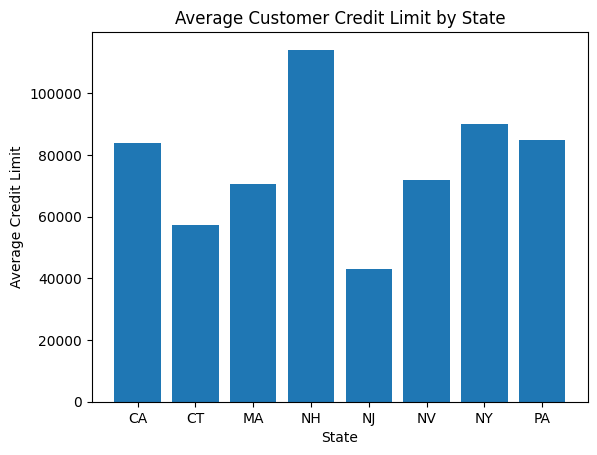

In [6]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
plt.bar(by_state_credit_df["state"], by_state_credit_df["avg_credit_limit"])

# Add labels and a title
plt.xlabel('State')
plt.ylabel('Average Credit Limit')
plt.title('Average Customer Credit Limit by State')

# Display the plot
plt.show()        

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [7]:
# Top ten customers by total payments pulled to top10_customer_df

top10_customer_df = pd.read_sql("""
        SELECT customerName, SUM(p.amount) AS Total_Payments
            FROM customers AS c
         JOIN payments AS p
          USING (customerNumber)
         GROUP BY customerName
         ORDER BY Total_Payments DESC
         LIMIT 10;
""", conn1)

top10_customer_df

,customerName,Total_Payments
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

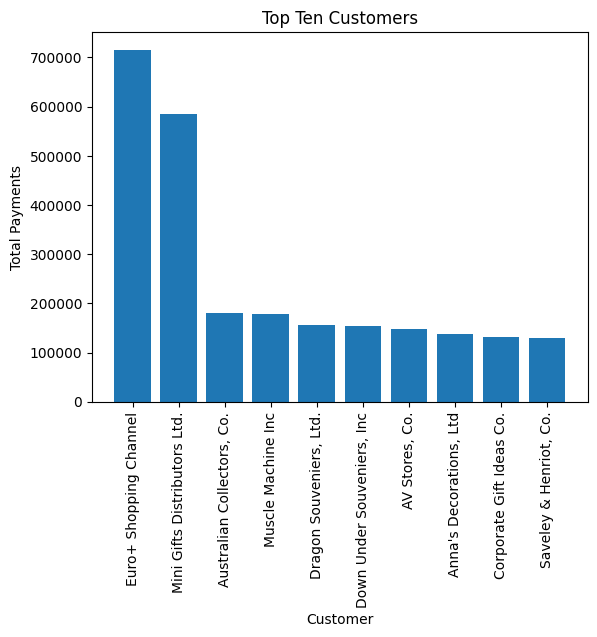

In [8]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.bar(top10_customer_df["customerName"], top10_customer_df["Total_Payments"])

# Add labels and a title
plt.xticks(rotation = 90)
plt.xlabel('Customer')
plt.ylabel('Total Payments')
plt.title('Top Ten Customers')

# Display the plot
plt.show()        

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [9]:
# Pulling commonly purchase items (10 or more by an individual customer) and grouping by customer in popular_items_df

popular_items_df = pd.read_sql("""
        SELECT c.customerName, p.productName, SUM(od.quantityOrdered) AS Quantity_Purchased
            FROM customers AS c
         JOIN orders AS o
          USING (customerNumber)
         JOIN orderdetails AS od
          USING (orderNumber)
         JOIN products AS p
          USING (productCode)
         GROUP BY c.customerName
          HAVING Quantity_Purchased >= 10
         ORDER BY Quantity_Purchased ASC;
""", conn1)

popular_items_df

,customerName,productName,Quantity_Purchased
0,Boards & Toys Co.,1912 Ford Model T Delivery Wagon,102
1,Atelier graphique,1965 Aston Martin DB5,270
2,Frau da Collezione,P-51-D Mustang,272
3,Royale Belge,1950's Chicago Surface Lines Streetcar,278
4,Auto-Moto Classics Inc.,1999 Yamaha Speed Boat,287
...,...,...,...
93,"AV Stores, Co.",1965 Aston Martin DB5,1778
94,La Rochelle Gifts,1969 Harley Davidson Ultimate Chopper,1832
95,"Australian Collectors, Co.",1996 Moto Guzzi 1100i,1926
96,Mini Gifts Distributors Ltd.,1958 Setra Bus,6366


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [10]:
# Pulling product informaiton by product line as product_line_info_df

product_line_info_df = pd.read_sql("""
        SELECT productLine, COUNT(DISTINCT productCode) AS Number_of_Products, SUM(od.quantityOrdered) AS Total_Quantity_Ordered
            FROM products
         JOIN orderdetails AS od
          USING (productCode)
        GROUP BY productLine
        ORDER BY Number_of_Products DESC;
""", conn1)

product_line_info_df

,productLine,Number_of_Products,Total_Quantity_Ordered
0,Classic Cars,37,35582
1,Vintage Cars,24,22933
2,Motorcycles,13,12778
3,Planes,12,11872
4,Trucks and Buses,11,11001
5,Ships,9,8532
6,Trains,3,2818


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

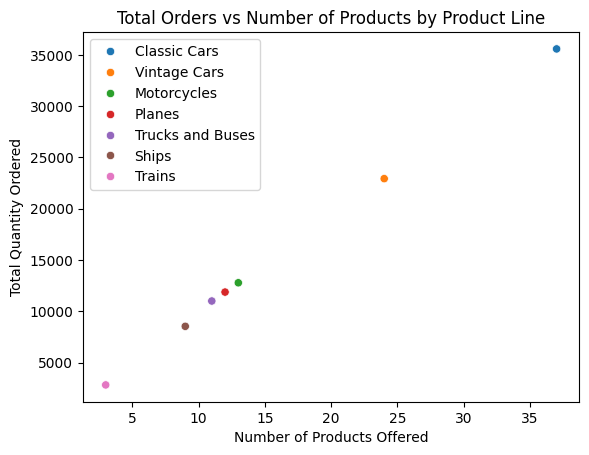

In [11]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
sns.scatterplot(x=product_line_info_df["Number_of_Products"], y=product_line_info_df["Total_Quantity_Ordered"], hue = product_line_info_df["productLine"])

# Add labels and a title
plt.xlabel('Number of Products Offered')
plt.ylabel('Total Quantity Ordered')
plt.title('Total Orders vs Number of Products by Product Line')

plt.legend()

# Display the plot
plt.show()     

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

## Type your answer in markdown here!

A scatter plot was used to display the relationship between number of products offered and the total quantity of products ordered for that product line. This type of visual was chosen in this case because it is a good option to show how two different quantities relate to each other. This is helpful is spotting to see if a there is a trend in the data. In this case, the data points trend up, showing that a larger variety of product offerings led to a larger number of total orders for that product line. 

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [12]:
# Taking an initial look at which offices have less than 5 employees
pd.read_sql("""
    SELECT officeCode, o.city, COUNT(DISTINCT employeeNumber) AS Number_of_Employees
        FROM employees
     JOIN offices AS o
      USING (officeCode)
     GROUP BY officeCode
""", conn1)

,officeCode,city,Number_of_Employees
0,1,San Francisco,6
1,2,Boston,2
2,3,NYC,2
3,4,Paris,5
4,5,Tokyo,2
5,6,Sydney,4
6,7,London,2


In [13]:
# Pulling information on employees that work in offices with fewer than 5 total employees to small_office_employees_df

small_office_employees_df = pd.read_sql("""
        SELECT lastName, firstName, officeCode, o.city, jobTitle, reportsTo AS supervisor
            FROM employees
         JOIN offices AS o
          USING (officeCode)
         WHERE officeCode IN(
             SELECT officeCode
                 FROM employees
              GROUP BY officeCode
              HAVING COUNT(DISTINCT employeeNumber) < 5)
          GROUP BY employeeNumber
          ORDER BY officeCode;
""", conn1)

small_office_employees_df

,lastName,firstName,officeCode,city,jobTitle,supervisor
0,Firrelli,Julie,2,Boston,Sales Rep,1143
1,Patterson,Steve,2,Boston,Sales Rep,1143
2,Tseng,Foon Yue,3,NYC,Sales Rep,1143
3,Vanauf,George,3,NYC,Sales Rep,1143
4,Nishi,Mami,5,Tokyo,Sales Rep,1056
5,Kato,Yoshimi,5,Tokyo,Sales Rep,1621
6,Patterson,William,6,Sydney,Sales Manager (APAC),1056
7,Fixter,Andy,6,Sydney,Sales Rep,1088
8,Marsh,Peter,6,Sydney,Sales Rep,1088
9,King,Tom,6,Sydney,Sales Rep,1088


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

## Type your answer in markdown here!

The subquery needed to narrow the results to offices that hold less than five employees. It is setup to look at the employees table and group by officeCode. It then counts the number of distinct employees with each office code and returns only those codes with a count less than five. 
The main query then uses those results to pull employees and offices information for each of those employees from the employee and office tables respectively.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [14]:
# Closing the connection to the database
conn1.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [15]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

Step 1: Initial look at tables to see data types, format, available information, and possible leads

This step is a matter of probing the data to see what is available and what might be of interest.

In [16]:
# Initial look at movie basics
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics""", conn4)

movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [17]:
# Initial look at movie ratings
movie_ratings_df = pd.read_sql("""SELECT * FROM movie_ratings""", conn4)

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [18]:
# Initial look at movie akas
movie_akas_df = pd.read_sql("""SELECT * FROM movie_akas""", conn4)

movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [19]:
# Examining what is given in the "region" category of movie_akas
movie_akas_df["region"].unique()

array(['BG', 'JP', 'BR', 'FR', 'GR', 'IT', 'HR', 'IL', 'MX', 'EE', 'SE',
       'US', 'DE', 'XWW', 'LV', 'PT', 'RU', 'CZ', 'CA', 'CL', 'RO', 'LT',
       'FI', 'PE', 'TR', 'NO', 'SI', 'UA', 'VN', 'DK', 'RS', 'SK', None,
       'ES', 'HU', 'PL', 'AZ', 'GE', 'UY', 'AR', 'GB', 'IN', 'CO', 'AU',
       'IE', 'AT', 'CN', 'KR', 'BA', 'VE', 'CH', 'DO', 'XEU', 'NL', 'BO',
       'JM', 'IR', 'XSA', 'MK', 'ID', 'TW', 'PH', 'TH', 'HK', 'PR', 'BE',
       'CU', 'AL', 'AN', 'EG', 'SG', 'IS', 'QA', 'NZ', 'AM', 'TN', 'MY',
       'SD', 'ZW', 'PS', 'MN', 'NG', 'SV', 'MA', 'BZ', 'UZ', 'AE', 'KP',
       'GH', 'PA', 'LU', 'ZA', 'CD', 'NP', 'LB', 'IQ', 'MH', 'EC', 'JO',
       'SN', 'BY', 'ET', 'PK', 'KZ', 'GP', 'ME', 'LK', 'DZ', 'VI', 'HN',
       'KH', 'CY', 'BD', 'AF', 'GT', 'XNA', 'CSHH', 'TT', 'SUHH', 'BH',
       'CV', 'PG', 'GU', 'TZ', 'MU', 'CR', 'PY', 'XKV', 'UG', 'AW', 'XAS',
       'BT', 'KE', 'SL', 'MD', 'RW', 'SY', 'BS', 'HT', 'MG', 'LA', 'MO',
       'MM', 'MW', 'SZ', 'AO', 'CG', 'KG', 'LR'

In [20]:
# Initial look at writers
writers_df = pd.read_sql("""SELECT * FROM writers""", conn4)

writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [21]:
# Initial look at persons
persons_df = pd.read_sql("""SELECT * FROM persons""", conn4)

persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


Step 2: Pulling data from various tables to start to look for trends in the data. 

This is done to see what possible relationships or values could be of interest as part of future exploration.

In [22]:
# Pulling possible pertinate data for initial analysis to movie_data_df
# Data includes: Title, Year, Runtime, Genre, Average Rating, Number of votes

movie_data_df = pd.read_sql("""
        SELECT mb.primary_title AS Title, mb.start_year AS Year, mb.runtime_minutes AS Runtime, mb.genres AS Genre,
                mr.averagerating AS Rating, mr.numvotes AS Votes
            FROM movie_basics AS mb
         JOIN movie_ratings as mr
          USING (movie_id)
         ORDER BY Year;
""", conn4)

movie_data_df

,Title,Year,Runtime,Genre,Rating,Votes
0,Pál Adrienn,2010,136.0,Drama,6.8,451
1,So Much for Justice!,2010,100.0,History,4.6,64
2,Children of the Green Dragon,2010,89.0,Drama,6.9,120
3,The Final Journey,2010,120.0,Drama,8.8,8
4,Quantum Quest: A Cassini Space Odyssey,2010,45.0,"Adventure,Animation,Sci-Fi",5.1,287
...,...,...,...,...,...,...
73851,Swarm Season,2019,86.0,Documentary,6.2,5
73852,Diabolik sono io,2019,75.0,Documentary,6.2,6
73853,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73854,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [23]:
# Pulling average runtime of movies by year to movie_length_df

movie_length_df = pd.read_sql("""
        SELECT start_year AS Year, AVG(runtime_minutes) AS Average_Runtime
              FROM movie_basics
         GROUP BY Year
          HAVING Year <= 2019
         ORDER BY Year;
""", conn4)

movie_length_df

,Year,Average_Runtime
0,2010,85.495694
1,2011,86.410106
2,2012,89.208856
3,2013,84.931670
4,2014,84.541500
5,2015,85.407108
6,2016,84.974249
7,2017,85.732214
8,2018,87.661099
9,2019,90.887358


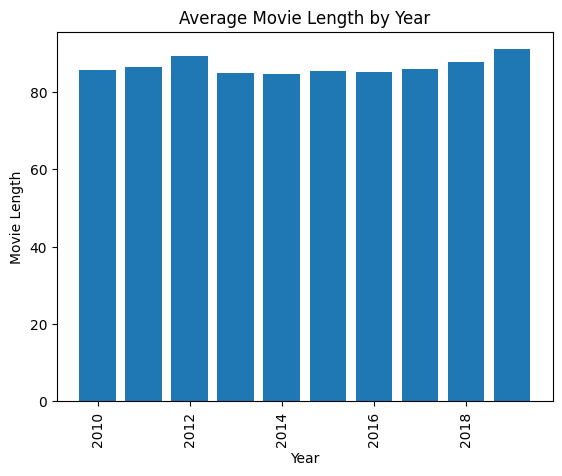

In [24]:
# Graphing for initial look at possible trends

plt.bar(movie_length_df["Year"], movie_length_df["Average_Runtime"])

# Add labels and a title
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Movie Length')
plt.title('Average Movie Length by Year')

# Display the plot
plt.show()        

In [25]:
# Initial look into the various genre types listed

genre_by_year_df = pd.read_sql("""
        SELECT start_year AS Year, genres AS Genre
            FROM movie_basics
         WHERE Year <= 2019
         GROUP BY movie_id
         ORDER BY Year;
""", conn4)

genre_by_year_df

,Year,Genre
0,2010,Drama
1,2010,History
2,2010,Drama
3,2010,Drama
4,2010,"Adventure,Animation,Sci-Fi"
...,...,...
145076,2019,Documentary
145077,2019,Drama
145078,2019,"Drama,Thriller"
145079,2019,"Adventure,History,War"


In [26]:
genre_by_year_df["Genre"].unique()

array(['Drama', 'History', 'Adventure,Animation,Sci-Fi', ...,
       'Music,Sci-Fi,Thriller', 'Mystery,Reality-TV,Thriller',
       'Adventure,History,War'], dtype=object)

In [27]:
# Looking at top 20 average movie ratings by writer. It filters for a minimum of 10 movies listed and over 500 votes

writer_rating_df = pd.read_sql("""
        SELECT p.primary_name AS Writer_Name, AVG(mr.averagerating) AS Avg_Movie_Rating, mr.numvotes AS Number_of_Votes, 
                COUNT(DISTINCT movie_id) AS Number_of_Movies, mb.genres AS Genre
            FROM persons AS p
         JOIN writers AS w
          USING (person_id)
         JOIN movie_basics AS mb
          USING (movie_id)
         JOIN movie_ratings AS mr
          USING (movie_id)
         GROUP BY Writer_Name
          HAVING Number_of_Votes >= 500 AND Number_of_Movies >= 10
         ORDER BY Avg_Movie_Rating DESC
         LIMIT 20;
""", conn4)

writer_rating_df

,Writer_Name,Avg_Movie_Rating,Number_of_Votes,Number_of_Movies,Genre
0,Leiji Matsumoto,7.343750,5565,13,"Action,Adventure,Drama"
1,Jack Kirby,7.303704,668137,23,"Action,Adventure,Sci-Fi"
2,James Erskine,7.220000,1022,10,"Documentary,Sport"
3,William Shakespeare,7.152066,49550,110,"Adventure,Animation,Comedy"
4,Abhijeet Shirish Deshpande,7.140000,15378,10,"Action,Crime,Drama"
5,Stan Lee,7.115385,501213,24,"Action,Adventure,Comedy"
6,Alex Gibney,7.076190,6466,15,Documentary
7,Stephanie Sheh,7.037500,3450,11,"Animation,Drama"
8,Syam Pushkaran,6.975000,1539,12,"Comedy,Drama,Romance"
9,Sanjay,6.960000,547,10,"Action,Romance"


In [28]:
# looking at total number of entries by year

pd.read_sql("""
        SELECT start_year AS Year, COUNT(*) AS Number_of_Entries
         FROM movie_basics
        GROUP BY Year
         HAVING Year <= 2019
        ORDER BY Year;
""", conn4)

,Year,Number_of_Entries
0,2010,11849
1,2011,12900
2,2012,13787
3,2013,14709
4,2014,15589
5,2015,16243
6,2016,17272
7,2017,17504
8,2018,16849
9,2019,8379


Step 3: Looking at number of movies and average rating, by genre

After preliminary investigation, I decided to look at the trends in movie by genre. The following code blocks create data frames for the popular genre classifications of "Action/Adventure", "Drama", "Horror", "Comedy", "Sci-Fi", and "Documentary" respectively. Due to the drop in overall number of movies listed in 2019 from this data (See previous section), this year was removed for the purpose of finding trends.

In [29]:
# Looking at number of movies per year listed as action/adventure

action_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_Action_Movies, 
                AVG(mr.averagerating) AS Average_Action_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Action%" OR genres LIKE "%Adventure%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

action_df

,Year,Number_of_Action_Movies,Average_Action_Rating
0,2010,901,5.841620
1,2011,950,5.896218
2,2012,949,6.024185
3,2013,1051,5.936493
4,2014,1090,6.050366
5,2015,1115,5.900179
6,2016,1165,5.957290
7,2017,1139,5.985814
8,2018,935,5.996269


In [30]:
# Looking at number of movies per year listed as drama

drama_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_Drama_Movies, 
                AVG(mr.averagerating) AS Average_Drama_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Drama%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

drama_df

,Year,Number_of_Drama_Movies,Average_Drama_Rating
0,2010,2883,6.279256
1,2011,3076,6.320640
2,2012,3153,6.377732
3,2013,3481,6.392679
4,2014,3509,6.417824
5,2015,3599,6.292808
6,2016,3499,6.388533
7,2017,3455,6.467298
8,2018,3039,6.554584


In [31]:
horror_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_Horror_Movies, 
                AVG(mr.averagerating) AS Average_Horror_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Horror%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

horror_df

,Year,Number_of_Horror_Movies,Average_Horror_Rating
0,2010,646,4.862384
1,2011,699,4.886409
2,2012,825,4.992745
3,2013,804,4.906420
4,2014,898,5.011123
5,2015,879,4.887797
6,2016,949,4.980693
7,2017,957,5.080021
8,2018,788,5.210253


In [32]:
comedy_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_Comedy_Movies, 
                AVG(mr.averagerating) AS Average_Comedy_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Comedy%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

comedy_df

,Year,Number_of_Comedy_Movies,Average_Comedy_Rating
0,2010,1606,5.959215
1,2011,1755,5.927004
2,2012,1823,5.977601
3,2013,1894,6.023272
4,2014,1981,5.972320
5,2015,1946,5.924193
6,2016,2008,5.983209
7,2017,1909,6.054754
8,2018,1784,6.075028


In [33]:
scifi_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_SciFi_Movies, 
                AVG(mr.averagerating) AS Average_SciFi_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Sci-Fi%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

scifi_df

,Year,Number_of_SciFi_Movies,Average_SciFi_Rating
0,2010,196,5.314796
1,2011,200,5.432500
2,2012,208,5.362981
3,2013,259,5.381538
4,2014,252,5.304743
5,2015,269,5.385978
6,2016,251,5.597619
7,2017,281,5.592527
8,2018,220,5.745909


In [34]:
docu_df = pd.read_sql("""
        SELECT mb.start_year AS Year, COUNT(DISTINCT mb.primary_title) as Number_of_Docu_Movies, 
                AVG(mr.averagerating) AS Average_Docu_Rating
            FROM movie_basics AS mb
         JOIN movie_ratings AS mr
          USING (movie_id)
         WHERE genres LIKE "%Document%"
         GROUP BY Year
          HAVING Year < 2019
         ORDER BY Year
""", conn4)

docu_df

,Year,Number_of_Docu_Movies,Average_Docu_Rating
0,2010,1644,7.299270
1,2011,1852,7.295845
2,2012,1940,7.247041
3,2013,2024,7.237395
4,2014,2153,7.324373
5,2015,2103,7.338889
6,2016,2090,7.386921
7,2017,2014,7.390833
8,2018,1511,7.429497


Step 4: Graphing Genre Data

Using the created dataframes, this section creates two graphs. The first shows the total number of movies listed in each category.
The second graph shows the average rating of movies in each genre category.

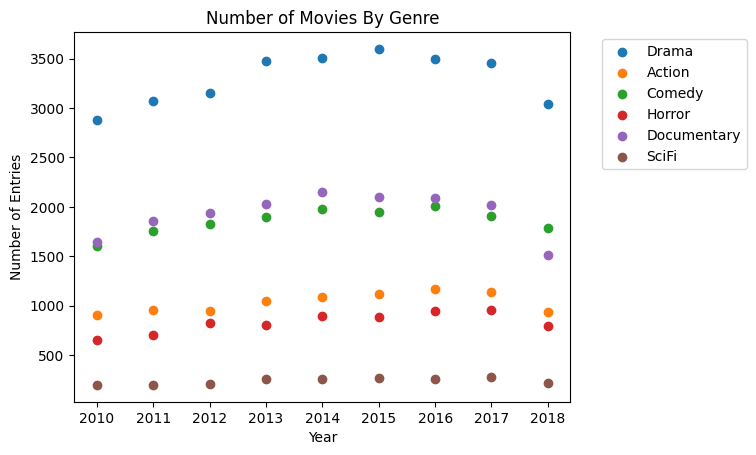

In [35]:
# Graphing ratings by genre by year

plt.scatter(drama_df["Year"], drama_df["Number_of_Drama_Movies"], label="Drama")
plt.scatter(action_df["Year"], action_df["Number_of_Action_Movies"], label="Action")
plt.scatter(comedy_df["Year"], comedy_df["Number_of_Comedy_Movies"], label="Comedy")
plt.scatter(horror_df["Year"], horror_df["Number_of_Horror_Movies"], label="Horror")
plt.scatter(docu_df["Year"], docu_df["Number_of_Docu_Movies"], label="Documentary")
plt.scatter(scifi_df["Year"], scifi_df["Number_of_SciFi_Movies"], label="SciFi")

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.title('Number of Movies By Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()     

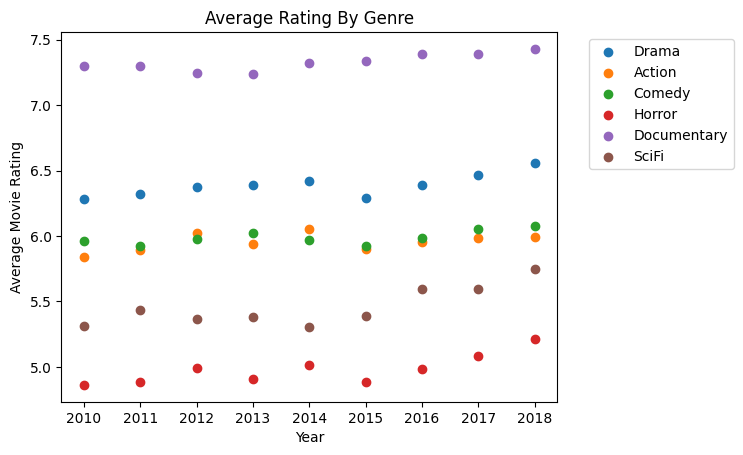

In [36]:
# Graphing Average rating by genre by year

plt.scatter(drama_df["Year"], drama_df["Average_Drama_Rating"], label="Drama")
plt.scatter(action_df["Year"], action_df["Average_Action_Rating"], label="Action")
plt.scatter(comedy_df["Year"], comedy_df["Average_Comedy_Rating"], label="Comedy")
plt.scatter(horror_df["Year"], horror_df["Average_Horror_Rating"], label="Horror")
plt.scatter(docu_df["Year"], docu_df["Average_Docu_Rating"], label="Documentary")
plt.scatter(scifi_df["Year"], scifi_df["Average_SciFi_Rating"], label="SciFi")

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Average Movie Rating')
plt.title('Average Rating By Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()     

In [37]:
# Rerunning earlier writer query with the focus on sci fi content

writer_rating_scifi_df = pd.read_sql("""
        SELECT p.primary_name AS Writer_Name, AVG(mr.averagerating) AS Avg_Movie_Rating, mr.numvotes AS Number_of_Votes, 
                COUNT(DISTINCT movie_id) AS Number_of_Movies, mb.genres AS Genre
            FROM persons AS p
         JOIN writers AS w
          USING (person_id)
         JOIN movie_basics AS mb
          USING (movie_id)
         JOIN movie_ratings AS mr
          USING (movie_id)
         GROUP BY Writer_Name
          HAVING Number_of_Votes >= 500 AND Number_of_Movies >= 10 AND Genre LIKE "%Sci-Fi%"
         ORDER BY Avg_Movie_Rating DESC
         LIMIT 20;
""", conn4)

writer_rating_scifi_df

,Writer_Name,Avg_Movie_Rating,Number_of_Votes,Number_of_Movies,Genre
0,Jack Kirby,7.303704,668137,23,"Action,Adventure,Sci-Fi"
1,Jorge Guerricaechevarría,6.521053,3210,11,"Drama,Sci-Fi,Thriller"
2,Ritesh Shah,6.471429,4953,21,"Comedy,Romance,Sci-Fi"
3,Rajshri Sudhakar,5.991667,18891,12,"Action,Adventure,Sci-Fi"
4,Neil Johnson,5.821429,1091,14,Sci-Fi
5,Mary Shelley,5.500000,942,11,"Horror,Sci-Fi"
6,Sanjay Masoomm,5.358824,18891,17,"Action,Adventure,Sci-Fi"
7,Robin Bhatt,5.108333,18891,10,"Action,Adventure,Sci-Fi"


Step 5: Initial Conclusions

Several genres show an increase in rating in the second half of the decade analyzed. However, the most drastic increases look to be in the
categories of Horror and Sci-Fi. Horror seems to also show a trend up in number of movies, where Sci-Fi holds about level as the lowest of the categories listed.

Further analysis might be warranted to see if this increase in user rating and low quantity of movies signifies a possible underserved group.
The continued analysis would need to focus on whether this increase in average rating is an artifact of the data or if it shows a genuine increase
interest in the genre. Another avenue of further inquiry would be into the writers and director that are producing work in this genre, particularly
among mass-market movies (those with a large number of user ratings).

Before further analysis can be done, it would be important that the involved columns are cleaned. The main focus would be on the genre category. The preliminary look at unique genre types showed many variations and multiple categories per movie. This was handled in the initial analysis by looking for anything containing the key word(s) of each genre, but a more robust standardization would be required to have a higher degree of certainty
in the accuracy of the results.

In [38]:
conn4.close()